### Supervised VS Unsupervised Learning

*Supervised* learning involves teaching a machine learning model by providing it with labeled data, while *unsupervised* learning allows the model to discover patterns and information in unlabeled data. Supervised learning includes **classification** and **regression** techniques, while unsupervised learning involves methods such as **clustering**, **dimension reduction**, **density estimation**, and **market basket analysis**. Supervised learning provides more control and accuracy, while unsupervised learning is more exploratory and less controllable.

### Regression

*Regression* is a process of predicting a continuous value using one or more independent variables. The dependent variable is the value we want to predict, while the independent variables are the causes of that value. Regression models can be simple or multiple, depending on the number of independent variables used. Regression analysis has various applications, such as **forecasting**, **predictions**, and **estimations**. There are different regression algorithms available, each with its own specific conditions for application.

#### Simple Linear Regression

Linear regression is a statistical method used to model the relationship between two or more variables. It is a simple and widely used approach for predicting a continuous value based on other variables. In linear regression, there is a dependent variable and one or more independent variables. The goal is to find the best-fit line that minimizes the error between the predicted values and the actual values. The line is represented by a linear equation, where the coefficients (theta 0 and theta 1) are adjusted to minimize the mean squared error. Once the line is fitted to the data, it can be used to make predictions for new data points. Linear regression is fast, easy to understand, and highly interpretable, making it a useful tool in machine learning.

#### Model Evaluation in Regression Models

There are two main evaluation approaches discussed: **train and test** on the same dataset, and **train/test split**.

In the train and test on the same dataset approach, we use the entire dataset for training and then test the model on a small portion of the same dataset. This approach may result in high training accuracy but low out-of-sample accuracy, as the model is overfit to the training data.

The train/test split approach involves splitting the dataset into training and testing sets. The model is trained on the training set and then tested on the testing set. This approach provides a more accurate evaluation of out-of-sample accuracy, as the testing dataset is not part of the training data.

To calculate the **accuracy** of the model, we compare the predicted values with the actual values in the test set. There are different metrics to report the accuracy, but most of them are based on the similarity of the predicted and actual values.

Another evaluation approach called **K-fold cross-validation** is briefly mentioned, which performs multiple train/test splits using the same dataset and averages the results to produce a more consistent out-of-sample accuracy.

Overall, model evaluation is crucial in regression to ensure the accuracy and reliability of our models in predicting unknown cases.

#### Evaluation Metrics in Regression Models

Evaluation metrics are used to measure the performance and accuracy of a model in machine learning. They provide insights into how well the model is performing and help identify areas for improvement.

Mean Absolute Error (MAE): It is the mean of the absolute differences between the actual values and the predicted values. It provides the average error of the model.

Mean Squared Error (MSE): It is the mean of the squared differences between the actual values and the predicted values. It is more popular than MAE as it focuses more on larger errors.

Root Mean Squared Error (RMSE): It is the square root of the mean squared error. RMSE is interpretable in the same units as the response variable, making it easy to relate its information.

Relative Absolute Error: Also known as residual sum of square, it normalizes the total absolute error by dividing it by the total absolute error of the simple predictor.

Relative Squared Error: Similar to relative absolute error, it is widely adopted in the data science community for calculating R-squared.

R-squared: It is not an error metric but a popular metric for model accuracy. It represents how close the data values are to the fitted regression line. Higher R-squared values indicate a better fit of the model to the data.

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Set a random seed for reproducibility
torch.manual_seed(42)

# Generate some data (y = 3x + 2 + noise)
X = torch.linspace(0, 10, 100).reshape(-1, 1)  # 100 data points from 0 to 10
y = 3 * X + 2 + torch.randn(X.size())  # y = 3x + 2 + noise


In [3]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 1 input feature, 1 output feature

    def forward(self, x):
        return self.linear(x)


In [5]:
model = LinearRegressionModel()

# Define loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [6]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    
    # Forward pass
    y_pred = model(X)
    
    # Compute loss
    loss = criterion(y_pred, y)
    
    # Backward pass and optimization
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update parameters
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 1.5486
Epoch [200/1000], Loss: 1.1794
Epoch [300/1000], Loss: 1.0429
Epoch [400/1000], Loss: 0.9925
Epoch [500/1000], Loss: 0.9738
Epoch [600/1000], Loss: 0.9669
Epoch [700/1000], Loss: 0.9644
Epoch [800/1000], Loss: 0.9635
Epoch [900/1000], Loss: 0.9631
Epoch [1000/1000], Loss: 0.9630


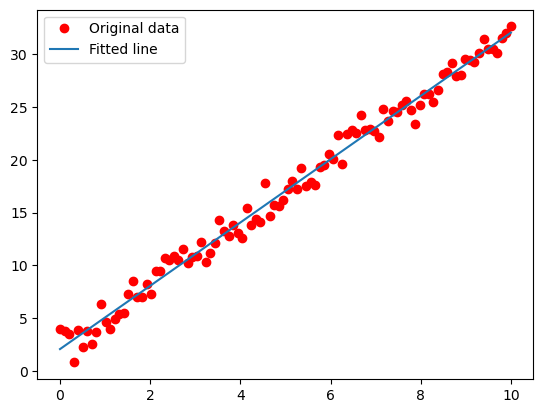

In [7]:
# Plot original data and fitted line
model.eval()  # Set to evaluation mode
with torch.no_grad():  # No need to track gradients
    predicted = model(X).detach().numpy()
    
plt.plot(X.numpy(), y.numpy(), 'ro', label='Original data')
plt.plot(X.numpy(), predicted, label='Fitted line')
plt.legend()
plt.show()


#### Multiple Linear Regression

Multiple linear regression, which is an extension of simple linear regression. Multiple linear regression is used when there are multiple independent variables that predict a dependent variable. It can be used to identify the strength of the effect that independent variables have on the dependent variable and to predict the impact of changes in the independent variables. The target value in multiple linear regression is a linear combination of the independent variables. The objective is to find the best fit hyperplane for the data by minimizing the mean squared error. The parameters of the regression equation can be estimated using methods like ordinary least squares or optimization algorithms. Once the parameters are found, predictions can be made by solving the linear equation. It is important to avoid overfitting the model by using too many independent variables without justification. 

In [8]:
# Set a random seed for reproducibility
torch.manual_seed(42)

# Generate some data (y = 3x1 + 2x2 + 1 + noise)
X = torch.randn(100, 2)  # 100 samples, 2 features
y = 3 * X[:, 0] + 2 * X[:, 1] + 1 + torch.randn(100)  # y = 3x1 + 2x2 + 1 + noise
y = y.view(-1, 1)  # Reshape y to be a column vector


In [9]:
class MultipleRegressionModel(nn.Module):
    def __init__(self):
        super(MultipleRegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1)  # 2 input features, 1 output feature

    def forward(self, x):
        return self.linear(x)


In [10]:
model = MultipleRegressionModel()

# Define loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [11]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    
    # Forward pass
    y_pred = model(X)
    
    # Compute loss
    loss = criterion(y_pred, y)
    
    # Backward pass and optimization
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update parameters
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 1.1184
Epoch [200/1000], Loss: 0.8162
Epoch [300/1000], Loss: 0.8120
Epoch [400/1000], Loss: 0.8119
Epoch [500/1000], Loss: 0.8119
Epoch [600/1000], Loss: 0.8119
Epoch [700/1000], Loss: 0.8119
Epoch [800/1000], Loss: 0.8119
Epoch [900/1000], Loss: 0.8119
Epoch [1000/1000], Loss: 0.8119


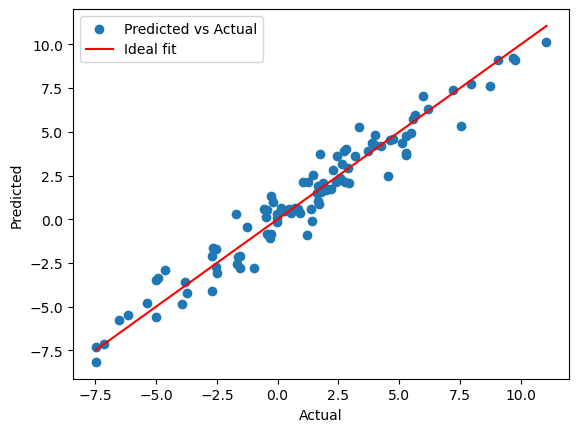

In [12]:
# Plot original data and predicted values
model.eval()  # Set to evaluation mode
with torch.no_grad():  # No need to track gradients
    predicted = model(X).detach().numpy()
    
plt.scatter(y.numpy(), predicted, label='Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([min(y.numpy()), max(y.numpy())], [min(y.numpy()), max(y.numpy())], color='red', label='Ideal fit')
plt.legend()
plt.show()


#### Classification

Classification is a supervised learning approach that involves categorizing unknown items into a set of classes. It aims to learn the relationship between a set of feature variables and a target variable of interest. The target attribute in classification is a categorical variable with discrete values.

The video explains how classification and classifiers work using the example of loan default prediction. In this example, a bank uses previous loan default data to predict which customers are likely to have problems repaying loans. The goal is to build a classifier that can label new customers as either defaulters or non-defaulters based on their information.

Classification can be used for both binary and multi-class classification. Binary classification involves predicting between two values, while multi-class classification involves predicting between multiple values. The video also mentions various business use cases for classification, such as predicting customer categories, churn detection, and advertising campaign response prediction.

Lastly, there are different types of classification algorithms, including decision trees, naive Bayes, linear discriminant analysis, k-nearest neighbor, logistic regression, neural networks, and support vector machines. These algorithms can be used to build classification models for various applications, such as email filtering, speech recognition, handwriting recognition, biometric identification, and document classification.